In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')


In [3]:
# Preview the dataset
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select relevant features (Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Create and fit the Mean Shift model
mean_shift = MeanShift()
mean_shift.fit(X_scaled)

MeanShift()

In [7]:
# Get cluster labels and cluster centers
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

In [8]:
# Print the results
print("Number of clusters found:", len(np.unique(labels)))
print("Cluster centers (scaled):", cluster_centers)

Number of clusters found: 1
Cluster centers (scaled): [[-0.18092309  0.03105725]]


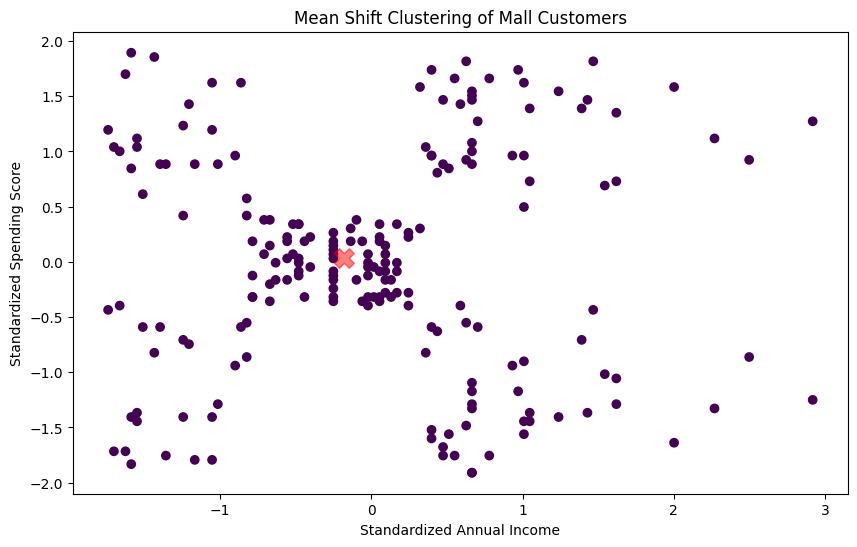

In [9]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='red', s=200, alpha=0.5, marker='X')  # Mark cluster centers
plt.title("Mean Shift Clustering of Mall Customers")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()